In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import librosa

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Загрузка аудиофайла
sampling_rate, data = wavfile.read("guitar_grasshopper.wav")

# Преобразование данных в моно (если требуется)
if len(data.shape) > 1:
    data = data.mean(axis=1)

# Параметры спектрограммы
window_size = 512
hop_size = 256

# Рассчитываем количество окон
num_windows = int(np.ceil(len(data) / hop_size))

# Заполнение данных нулями до полного окна
padding = num_windows * hop_size - len(data)
data = np.pad(data, (0, padding), 'constant')

# Создание окна Ханна
window = np.hanning(window_size)[:len(data)]


# Инициализация массива для хранения спектрограммы
spectrogram = np.empty((window_size, num_windows))

# Проход по каждому окну
for i in range(num_windows):
    # Извлечение сегмента данных
    start = i * hop_size
    end = start + window_size
    segment = data[start:end]

    # Применение окна Ханна
    windowed_segment = segment * window

    # Выполнение преобразования Фурье
    spectrum = np.fft.fft(windowed_segment)

    # Вычисление амплитуды спектра
    magnitude = np.abs(spectrum)

    # Сохранение спектра в спектрограмму
    spectrogram[:, i] = magnitude

# Нормализация спектрограммы
spectrogram /= np.max(spectrogram)

# Построение спектрограммы
plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Время (окна)')
plt.ylabel('Частота')
plt.title('Спектрограмма')
plt.show()

ValueError: operands could not be broadcast together with shapes (256,) (512,) 

In [9]:
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 940.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 984.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23703 sha256=db617eb3d24452af804e47ce44f07f2578c6c6a0315b3bee545b573738123911
  Stored in directory: /Users/d.yurochkin/Library/Caches/pip/wheels/7a/6a/b0/92760a6d6bc2bff5464970af910c0b0b921390993f3199cdf7
Successfully built audioread


22050


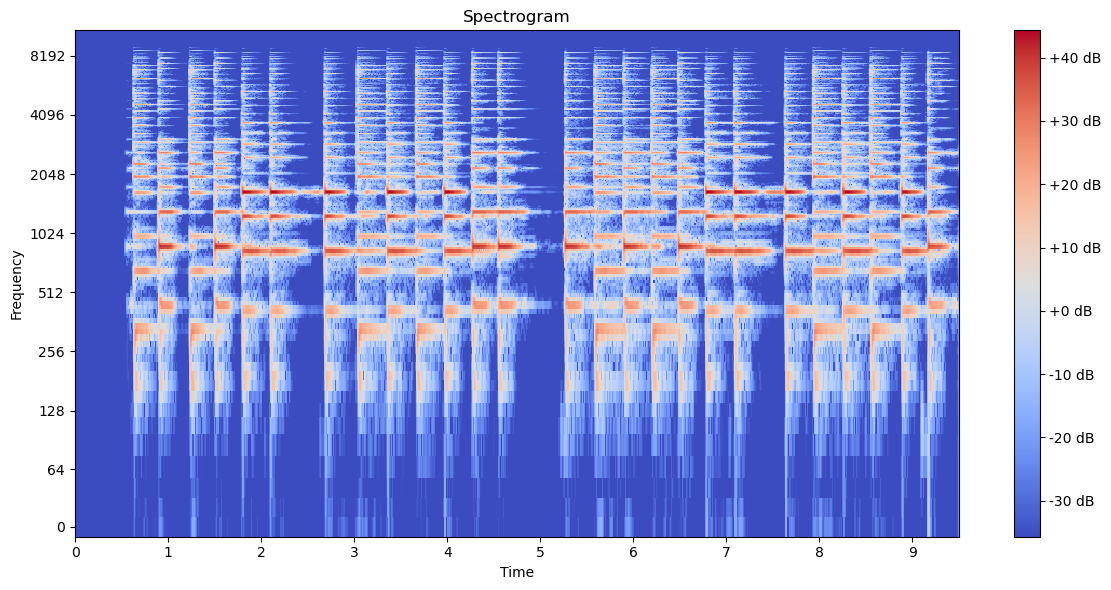

In [13]:


# Load the audio file
filename = "guitar_grasshopper_mono.wav"
audio, sr = librosa.load(filename)

# Define the parameters for the spectrogram
window_size = 1024  # Size of the window for the STFT
hop_length = int(window_size / 4)  # Hop size between consecutive windows
n_fft = window_size  # Number of FFT points (equal to the window size)

# Calculate the spectrogram
spectrogram = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window=signal.hann(window_size))
print(sr)
# Convert the spectrogram to dB scale
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))

# Plot the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log') 
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

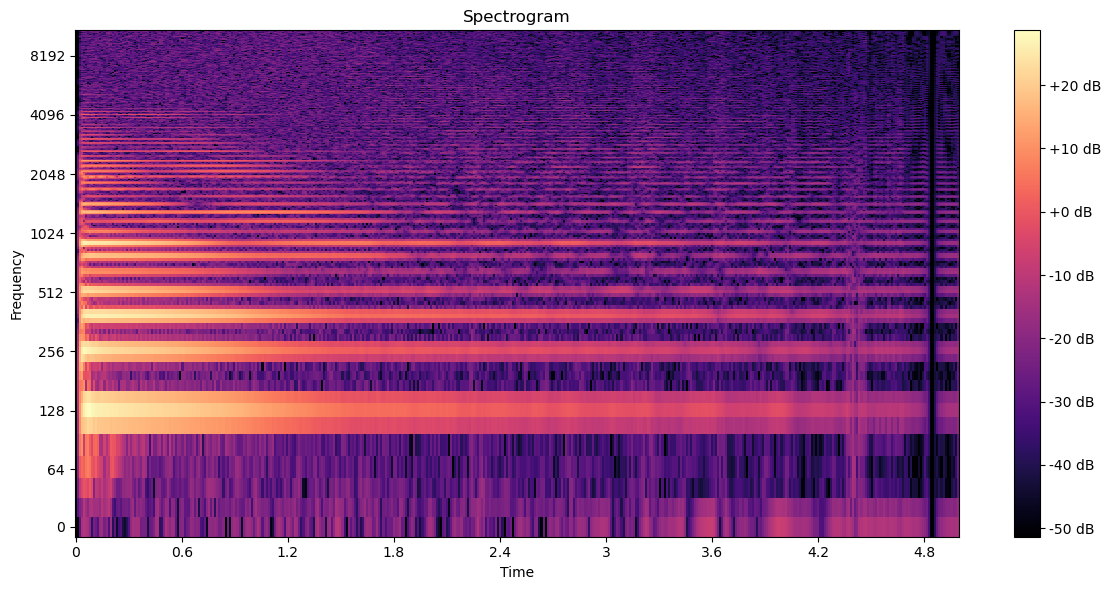

In [77]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import librosa

# Load the audio file
filename = "c2.wav"
audio, sr = librosa.load(filename)

# Define the parameters for the spectrogram
window_size = 1024  # Size of the window for the STFT
hop_length = int(window_size / 4)  # Hop size between consecutive windows
n_fft = window_size  # Number of FFT points (equal to the window size)

# Calculate the spectrogram
spectrogram = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window=signal.hann(window_size))

# Convert the spectrogram to dB scale
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))

# Plot the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log') #, cmap="hot")
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [10]:
filename = "guitar_grasshopper_mono.wav"
audio, sr = librosa.load(filename)

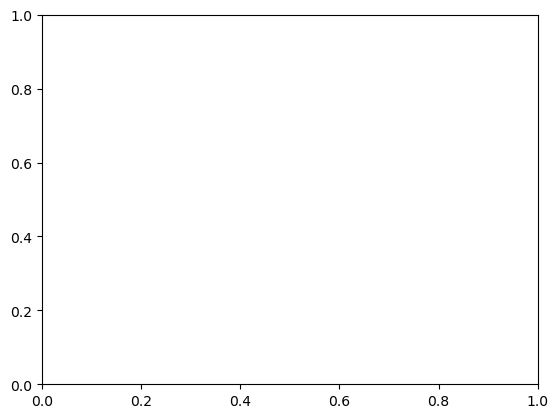

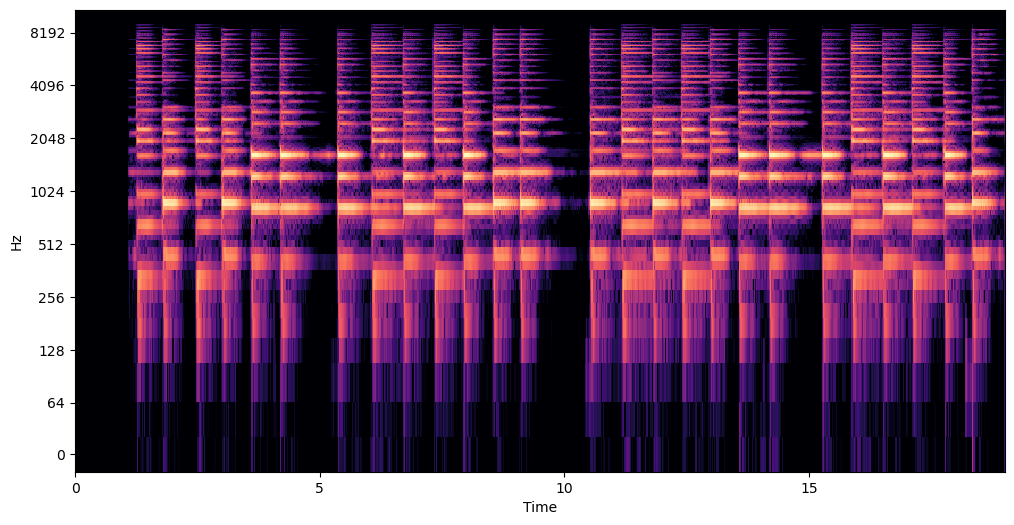

In [12]:
S = np.abs(librosa.stft(audio, n_fft=512, hop_length=256))
fig, ax = plt.subplots()
plt.figure(figsize=(12, 6))
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time',sr=sr) # ax=ax, sr=sr)
# ~ax.set_title('Power spectrogram')
# fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()